# Classification and Investigation into UVJ regions for Michael Brown's GALSEDATLAS templates, and GAL+AGN Composites
This script is intended to be used to investigate and explore the behaviour of Michael Brown's GALSEDATLAS templates in UVJ space. The templates are rest frame templates which will be plotted as UVJ points. A dataframe will be made for each template, plus AGN contribution, this will be plotted in UVJ space and classified with the my UVJ classification code. 

Using the UVJ classification for each percentage of AGN in the composiste we will investigate how AGN contribution effects the overal position of the galaxy in UVJ space. We will take note of the relative position that each of these points move, coming up with a metric to describe the movement, and we may also investigate the percentage of AGN that are moving into different regions at each increasing AGN contribution

i.e our population of quiescents:

0% AGN - inital position: 0% of population in SF, full quiescent population in inital population

10% AGN - some dx, dy: % of population now in SF

20% AGN - some more dx, dy: % of population now in SF

and so on, we could easily do a test with both this, and with the ZFOURGE SEDs to see how they change with time. This may be one of the avenues we can explore. 

This code is developed as a general purpose investigation so it may be converted into a set of resuseable functions in the helper package.

In [194]:
# Begin by importing all relevant libraries and packages
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To begin we would like to explore the Brown templates, 
we can use code similar to before to create a list of dataframes, and punch these through some code to 
create a list of composites. 
These composites will eventually be compiled into a master dataframe with 
id, UV_position, VJ_position, AGN_frac, region
this will allow easier processing of the UVJ code for selecting UVJ points
similarly whil there may be conflicts with the ID returning multiple
we expect this as there should be multiple id's at different AGN fraction

In [195]:
# setup all the directories we are getting our data from 
# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

# Swire templates
swire_folderpath = os.path.join('datasets', 'Templates', 'SWIRE')

# Brown templates
brown_folderpath = os.path.join('datasets', 'Templates', 'Brown', '2014','Rest')

# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')

In [196]:
# Load the filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)

In [197]:
templates_folderpath = brown_folderpath
model_folderpath = skirtor_folderpath

# Choose an AGN model
agn_model, agn_model_params = create_type1_skirtor_agn(skirtor_folderpath)

# Read in the set of templates 
galaxy_templates, galaxy_names = read_brown_galaxy_templates(templates_folderpath)


In [198]:
# Define the amount of alpha values to explore, we can make this as big or small as possible 
# depending on the tests we plan on running this data through. For now we will 
# use linearly spaced alpha values from 0 to 1
alpha_values = np.linspace(0, 1, 11)
print(alpha_values)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [199]:
# Now we want to make the composites of each of our galaxies
composites = generate_composite_set(agn_model, galaxy_templates, alpha_values)

In [200]:
# We want to find the UVJ colours for each of these also
# Generate the UVJ colours
uv, vj = generate_UVJ_composite_set_colours(composites, alpha_values, pb_U, pb_V, pb_J)

In [201]:
# So we have 11 alpha values, thus we will have 11 lists, and therefore 11x128 dataframes
# and thus 2x11x128 colours
# we want this as a dataframe with 128 id's, with an alpha column with a value, and 
# a uv and vj column with the associated colours

# To do this we need to create a dataframe with the id's of the galaxies
# and then add the alpha values to it
# and then add the uv and vj colours to it

# We have each of our names, make this the first value in our dataframe
df = pd.DataFrame(data=galaxy_names, columns=['id'])


In [202]:
df

,id
0,Arp_118
1,Arp_256_N
2,Arp_256_S
3,CGCG_049-057
4,CGCG_436-030
...,...
123,UGC_09618_N
124,UGC_09618
125,UGC_09618_S
126,UGC_12150


In [203]:
# We would now like to begin by adding the UV and VJ colours to this dataframe,
# this will be added as UV_0, VJ_0, UV_1, VJ_1, etc.
#where the number denotes the alpha value, this should be derived from the chosen alpha values
# that are used with linspace

# We will begin by adding the UV and VJ colours to the dataframe
# We will iterate through each of the alpha values and add the UV and VJ colours to the dataframe
# The alpha value for each UV, and VJ must be added for each of the 128 galaxies next to their respective name

# We will begin by adding the UV and VJ colours to the dataframe
# We will iterate through each of the alpha values and add the UV and VJ colours to the dataframe
# The alpha value for each UV, and VJ must be added for each of the 128 galaxies next to their respective name

for i, alpha in enumerate(alpha_values):
    df[f'UV_{int(alpha*100)}'] = uv[i]
    df[f'VJ_{int(alpha*100)}'] = vj[i]
    

In [204]:
df

,id,UV_0,VJ_0,UV_10,VJ_10,UV_20,VJ_20,UV_30,VJ_30,UV_40,...,UV_60,VJ_60,UV_70,VJ_70,UV_80,VJ_80,UV_90,VJ_90,UV_100,VJ_100
0,Arp_118,1.933255,1.301228,1.842054,1.289053,1.761626,1.277306,1.689982,1.265963,1.625624,...,1.514390,1.234157,1.465876,1.224235,1.421266,1.214625,1.380071,1.205313,1.341888,1.196284
1,Arp_256_N,1.007842,0.707852,0.982618,0.705453,0.959059,0.703157,0.937000,0.700957,0.916299,...,0.878485,0.694877,0.861166,0.693007,0.844786,0.691207,0.829271,0.689475,0.814551,0.687805
2,Arp_256_S,0.954224,0.897941,0.906702,0.885241,0.865282,0.873580,0.828835,0.862833,0.796499,...,0.741615,0.835118,0.718113,0.827130,0.696752,0.819666,0.677247,0.812675,0.659364,0.806112
3,CGCG_049-057,2.138990,1.460638,1.932274,1.433992,1.772366,1.409016,1.643696,1.385553,1.537229,...,1.370006,1.322934,1.302766,1.304292,1.243612,1.286617,1.191093,1.269832,1.144100,1.253870
4,CGCG_436-030,1.169469,0.991655,1.086098,0.971926,1.017044,0.954092,0.958801,0.937890,0.908947,...,0.827926,0.897097,0.794518,0.885598,0.764780,0.874952,0.738128,0.865067,0.714100,0.855864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,UGC_09618_N,1.837419,1.715520,1.685730,1.683803,1.563445,1.653970,1.462173,1.625848,1.376577,...,1.239107,1.550318,1.182863,1.527691,1.132952,1.506173,1.088317,1.485682,1.048131,1.466141
124,UGC_09618,1.474354,1.402568,1.399898,1.383292,1.334616,1.364953,1.276814,1.347483,1.225205,...,1.136799,1.299692,1.098588,1.285129,1.063653,1.271177,1.031572,1.257796,1.001998,1.244952
125,UGC_09618_S,1.241591,0.864132,1.206535,0.858980,1.173996,0.854024,1.143700,0.849252,1.115412,...,1.064078,0.835948,1.040706,0.831821,1.018679,0.827835,0.997882,0.823982,0.978209,0.820256
126,UGC_12150,2.146825,1.465164,1.966561,1.442359,1.822541,1.420777,1.703864,1.400318,1.603823,...,1.443358,1.344836,1.377688,1.328069,1.319365,1.312064,1.267150,1.296768,1.220080,1.282134


1.1962841283124526


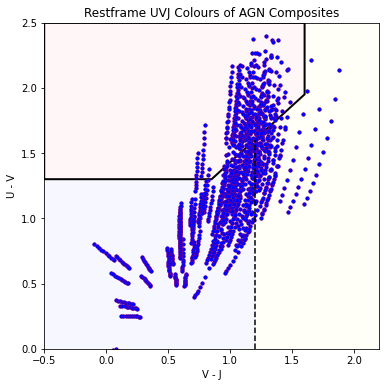

In [205]:
# To check this is correct plot the path of the UVJ colours from 0 to 100
# Plot for one of the galaxies, we will choose the first one,
# ehere U-V is y, V-J is x
n=0
print(df[f'VJ_{int(alpha*100)}'][n])

plt.figure(figsize=(6, 6))
n=0
for n in range(0, 128):
    for alpha in alpha_values:
        plt.plot(df[f'VJ_{int(alpha*100)}'][n], df[f'UV_{int(alpha*100)}'][n], 'r.', label='0')
        plt.plot(df[f'VJ_{int(alpha*100)}'][n], df[f'UV_{int(alpha*100)}'][n], 'b.', label='100')
        # Join the points from each alpha value, but not galaxies together
        #plt.plot(df[f'VJ_{int(alpha*100)}'][n:n+2], df[f'UV_{int(alpha*100)}'][n:n+2], 'k-', label='100')
        
# UVJ PLot Setup
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
    # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


plt.show()

In [206]:
# Plot only the final 100% contribution
plt.figure(figsize=(6, 6))
plt.plot(df['VJ_100'], df['UV_100'], 'r.')
# UVJ PLot Setup
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
    # Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


In [207]:
# Now we have the dataframe with the UV and VJ colours for each of the galaxies
# and each of the UV and VJ points are given such that they have an associated alpha value
# Do some plotting 

# Calculate a difference vector for each of the UV and VJ colours, at each alpha value, i.e 0->1, 0->2, 0->3, etc.
# This will be used to calculate the distance between each of the points
# This will be done for each of the UV and VJ colours and store in the dataframe

# Do this later
# The magnitude difference from 0 to 1, 0 to 2, etc
# is given for each value of alpha as: sqrt(uv_0^2 + vj_0^2) - sqrt(uv_n^2 + vj_n^2)
# where n is the particular alpha distance we are calculating

# Calculate this
for i, alpha in enumerate(alpha_values):
    df[f'MagDiff_0_to_{i}'] = abs(np.sqrt(df[f'UV_0']**2 + df[f'VJ_0']**2) - np.sqrt(df[f'UV_{int(alpha_values[i]*100)}']**2 + df[f'VJ_{int(alpha_values[i]*100)}']**2))

In [208]:
df['MagDiff_0_to_0']

# histogram of the magnitude differences for all alpha
# plt.hist(df['MagDiff_0_to_1'])
# plt.hist(df['MagDiff_0_to_2'])
# plt.hist(df['MagDiff_0_to_3'])
# plt.hist(df['MagDiff_0_to_4'])
# plt.hist(df['MagDiff_0_to_5'])
# plt.hist(df['MagDiff_0_to_6'])
# plt.hist(df['MagDiff_0_to_7'])
# plt.hist(df['MagDiff_0_to_8'])
# plt.hist(df['MagDiff_0_to_9'])
# plt.hist(df['MagDiff_0_to_10'])

# We can see that the magnitude differences are not normally distributed, this is expected
# as we are dealing with a composite set of galaxies and AGN models, and the UVJ colours
# are not expected to be normally distributed


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
123    0.0
124    0.0
125    0.0
126    0.0
127    0.0
Name: MagDiff_0_to_0, Length: 128, dtype: float64

In [209]:
# Now we can actually start doing some UVJ analysis, use my UVJ code to make a UVJ plot

# We redefine our UVJ categorisation function to take in the dataframe, and the x and y values
# that we supply from the dataframe, outputting a galaxy classification for that particular alpha value
def categorise_uvj(df, x, y, alpha):
    id = df['id']
    #x = df['mag_V'] - df['mag_J'] # VJ Colours 
    #y = df['mag_U'] - df['mag_V'] # UV Colours

    # Plot the UVJ diagram
    plt.figure(figsize=(6, 6))

    xmax = 2.2
    ymax = 2.5
    xmin = -0.5
    ymin = 0

    # Set the plotting limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # Define the points for a quiescent galaxy selection
    x_points = [-0.5, 0.85, 1.6, 1.6]
    y_points = [1.3, 1.3, 1.95, 2.5]

    # Plot the points
    plt.plot(x_points, y_points, linestyle='-')

    # Interpolate the y-value at x=1.2
    x_target = 1.2
    y_target = np.interp(x_target, x_points, y_points)

    # Plot the interpolated point, this separates everything on the right as dusty galaxies,
    # and everything on the left as star-forming galaxies
    plt.plot([x_target, x_target], [0, y_target], linestyle='--')

    quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
    quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
    # We want to make a wedge selection for the Quiescent Selection of Galaxies
    points = np.column_stack([x, y])
    verts = np.array([quiescent_x, quiescent_y]).T
    path = mpath.Path(verts)
    
    
    # Define the path for point selection
    #selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

    # Use path.contains_points to get a boolean array
    points_inside_selection = path.contains_points(np.column_stack([x, y]))
    
    
    
    dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
    star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)
    
    

    # Filter the DataFrame using the boolean array
    selected_df = df[points_inside_selection] # For quiescent, clean later
    

    # Mark dusty, and star-forming galaxies
    df.loc[dusty_condition, f'GalaxyType_{int(alpha*100)}'] = 2
    df.loc[star_forming_condition, f'GalaxyType_{int(alpha*100)}'] = 1
    
    
    
    
    #print(selected_df)
    #print(unselected_df)
    
    # Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
    #print(selected_df)
    selected_ids = selected_df['id']
    df.loc[df['id'].isin(selected_ids), f'GalaxyType_{int(alpha*100)}'] = 0 # This is what makes the selection happen
    
    
    
    # Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
    #unselected_ids = unselected_df['id']
    
    
    
    
    # Sort the quiescent and non-quiescent galaxies
    quiescent_points = points[path.contains_points(points)]
    # Find the points from here to categorise dusty, and star-forming galaxies
    non_quiescent_points = points[~path.contains_points(points)]
    dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
    star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]
    
    
    #print(non_quiescent_points[0][0])
    
    #print(y)
    # Plot the selected points
    #plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
    plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=3, alpha=0.5, label='Quiescent Selection')
    plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')

    plt.xlabel('Restframe V-J [Mag]')
    plt.ylabel('Restframe U-V [Mag]')
    plt.title('UVJ Diagram for the CDFS field')
    plt.legend()
    plt.show()
    return df

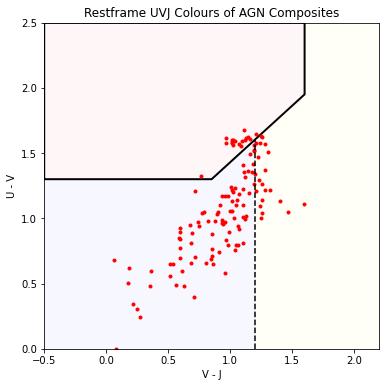

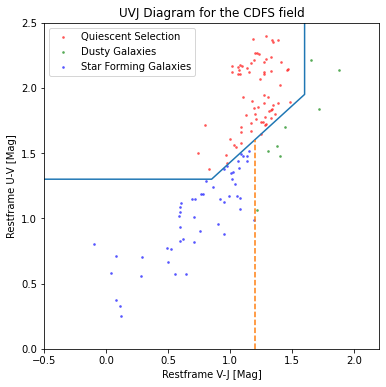

In [210]:
# Lets try and do this for our first alpha value
df = categorise_uvj(df, df['VJ_0'], df['UV_0'], 0)

In [211]:
df['GalaxyType_0'].value_counts()

0.0    68
1.0    52
2.0     8
Name: GalaxyType_0, dtype: int64

Alpha: 0.0


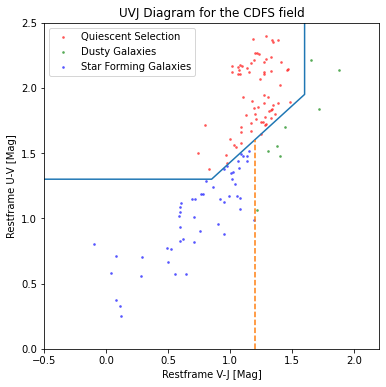

0.0    68
1.0    52
2.0     8
Name: GalaxyType_0, dtype: int64
Alpha: 0.1


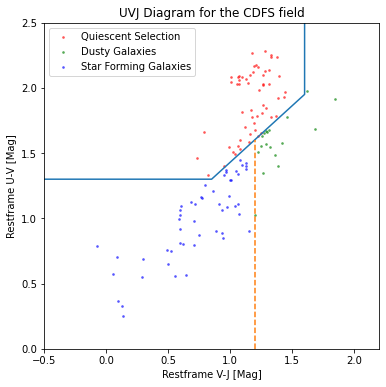

0.0    57
1.0    53
2.0    18
Name: GalaxyType_10, dtype: int64
Alpha: 0.2


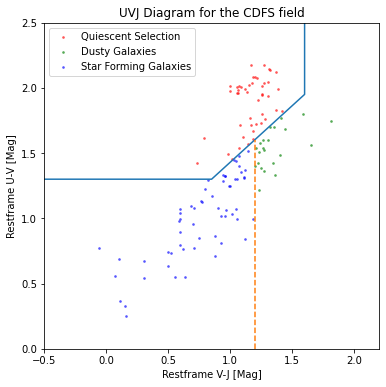

1.0    60
0.0    46
2.0    22
Name: GalaxyType_20, dtype: int64
Alpha: 0.30000000000000004


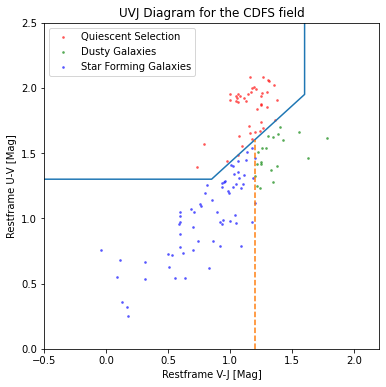

1.0    66
0.0    42
2.0    20
Name: GalaxyType_30, dtype: int64
Alpha: 0.4


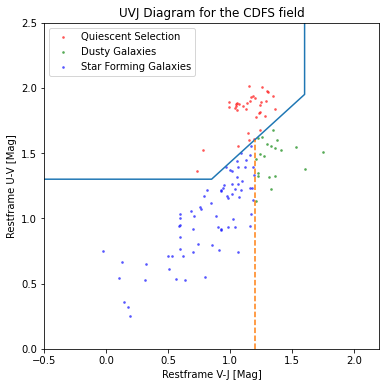

1.0    73
0.0    35
2.0    20
Name: GalaxyType_40, dtype: int64
Alpha: 0.5


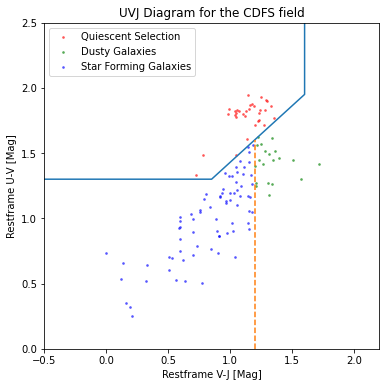

1.0    76
0.0    32
2.0    20
Name: GalaxyType_50, dtype: int64
Alpha: 0.6000000000000001


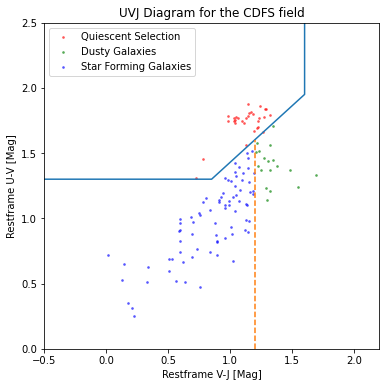

1.0    80
0.0    30
2.0    18
Name: GalaxyType_60, dtype: int64
Alpha: 0.7000000000000001


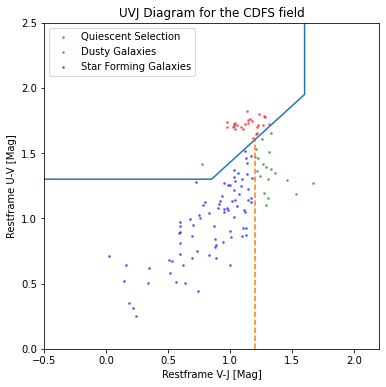

1.0    82
0.0    27
2.0    19
Name: GalaxyType_70, dtype: int64
Alpha: 0.8


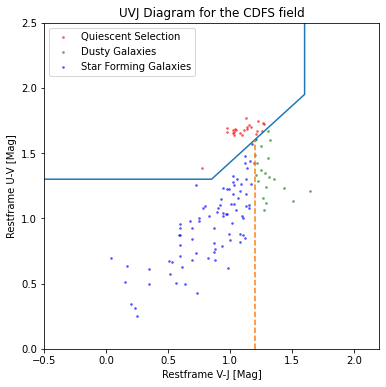

1.0    84
0.0    23
2.0    21
Name: GalaxyType_80, dtype: int64
Alpha: 0.9


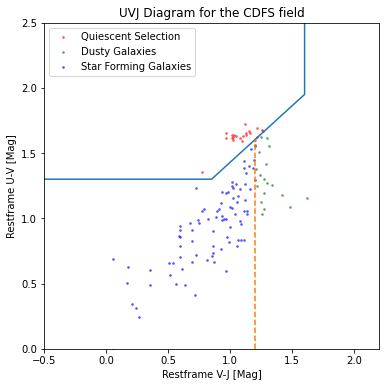

1.0    87
0.0    22
2.0    19
Name: GalaxyType_90, dtype: int64
Alpha: 1.0


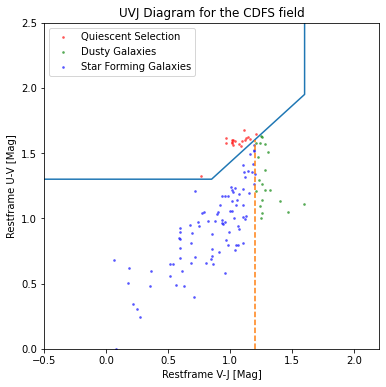

1.0    90
2.0    20
0.0    18
Name: GalaxyType_100, dtype: int64


In [212]:
# Now that we can do this for one, we want to recreate this plot, categorising the galaxies for each of the alpha values

for i, alpha in enumerate(alpha_values):
    print(f'Alpha: {alpha}')
    df = categorise_uvj(df, df[f'VJ_{int(alpha*100)}'], df[f'UV_{int(alpha*100)}'], alpha)
    print(df[f'GalaxyType_{int(alpha*100)}'].value_counts())

# Printing our if this was sucessful, by checking the value counts for each 
# of the galaxy types
    
    

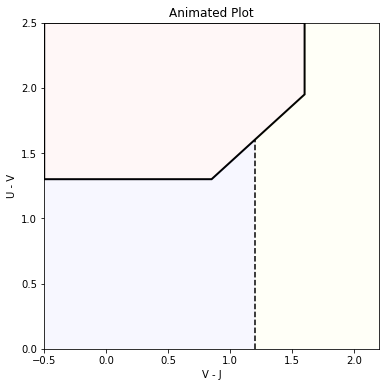

MovieWriter imagemagick unavailable; using Pillow instead.


In [213]:
# To show how this works, we would like to show an animation of the changing UVJ diagram as the contribution increases
# This will be done by plotting the UVJ diagram for each of the alpha values, and then saving the plot as a frame
# We will then use the frames to create an animation

# We will begin by plotting the UVJ diagram for each of the alpha values
# We will then save the plot as a frame
# We will then use the frames to create an animation
# We will add this to the animation function
import matplotlib.animation as animation

fig, ax = plt.figure(figsize=(6, 6)), plt.gca()
ax.set_xlim([-0.5, 2.2])
ax.set_ylim([0, 2.5])
ax.set_ylabel('U - V')
ax.set_xlabel('V - J')
ax.set_title("Animated Plot")

path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

patch_quiescent = plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid')
patch_sf = plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03))
patch_sfd = plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03))

ax.add_patch(patch_quiescent)
ax.add_patch(patch_sf)
ax.add_patch(patch_sfd)

line = ax.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

def animate(i):
    alpha = alpha_values[i]
    ax.clear()
    ax.set_xlim([-0.5, 2.2])
    ax.set_ylim([0, 2.5])
    ax.set_ylabel('U - V')
    ax.set_xlabel('V - J')
    ax.set_title("The Effect of AGN Contribution on the Rest Frame UVJ Diagram")
    
    #ax.plot(df[f'VJ_{int(alpha*100)}'], df[f'UV_{int(alpha*100)}'], 'r.', label=f'AGN Contribution {int(alpha*100)}%')
    
    # We want to plot the quiescent, star-forming, and dusty galaxies in different colours 
    # based on the galaxy type
    quiescent_galaxies = df[df[f'GalaxyType_{int(alpha*100)}'] == 0]
    star_forming_galaxies = df[df[f'GalaxyType_{int(alpha*100)}'] == 1]
    dusty_galaxies = df[df[f'GalaxyType_{int(alpha*100)}'] == 2]
    
    ax.scatter(quiescent_galaxies[f'VJ_{int(alpha*100)}'], quiescent_galaxies[f'UV_{int(alpha*100)}'], c='r', s=3, alpha=0.5, label='Quiescent Galaxies')
    ax.scatter(star_forming_galaxies[f'VJ_{int(alpha*100)}'], star_forming_galaxies[f'UV_{int(alpha*100)}'], c='b', s=3, alpha=0.5, label='Star Forming Galaxies')
    ax.scatter(dusty_galaxies[f'VJ_{int(alpha*100)}'], dusty_galaxies[f'UV_{int(alpha*100)}'], c='g', s=3, alpha=0.5, label='Dusty Galaxies')
    
    # Ad some text text showing the alpha value
    ax.text(-0.4, 0.1, f'AGN Contribution: {int(alpha*100)}%', fontsize=12)
    
    ax.add_patch(patch_quiescent)
    ax.add_patch(patch_sf)
    ax.add_patch(patch_sfd)
    ax.legend()
    line = ax.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
    return line, ax

ani = animation.FuncAnimation(fig, animate, frames=len(alpha_values), repeat=False)

plt.show()

# There is no output, this is due to the fact that the animation is not being displayed in the notebook
# We can save the animation as a gif, and then display it in the notebook

ani.save('outputs/UVJPlots/UVJ_Animation_Colour.gif', writer='imagemagick', fps=1)

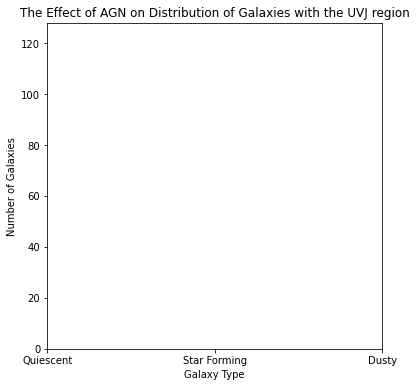

MovieWriter imagemagick unavailable; using Pillow instead.


In [214]:
# Similarly we would like to plot a histogram of the number of classifications for each of the galaxy types
# and show an animation of how that changes with increasing AGN contribution

fig, ax = plt.figure(figsize=(6, 6)), plt.gca()
ax.set_ylim([0, 128])
ax.set_ylabel('Number of Galaxies')
ax.set_xlabel('Galaxy Type')
ax.set_title("The Effect of AGN on Distribution of Galaxies with the UVJ region")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Quiescent', 'Star Forming', 'Dusty'])
def animate(i):
    # Get the galaxy type counts for each of the alpha values
    alpha = alpha_values[i]
    galaxy_type_counts = df[f'GalaxyType_{int(alpha*100)}'].value_counts()
    ax.clear()
    ax.set_ylim([0, 128])
    
    # Ensure the x-axis is labelled correctly
    # instead of numerical values we are plotting the galaxy type
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Quiescent', 'Star Forming', 'Dusty'])
    
    
    ax.set_ylabel('Number of Galaxies')
    ax.set_xlabel('Galaxy Type')
    ax.set_title("The Effect of AGN on Distribution of Galaxies with the UVJ region")
    
    # 1 - Star Forming
    # 0 - Quiescent
    # 2 - Dusty
    
    # Instead of plotting the type of galaxy, we will plot the number of galaxies of each type
    # and make 1 be star forming in blue, 0 be quiescent in red, and 2 be dusty in green
    
    # We want to plot the quiescent, star-forming, and dusty galaxies in different colours
    # based on the galaxy type
    galaxy_type_counts = galaxy_type_counts.sort_index()
    
    # Plot the galaxy type counts, with colours denoting the galaxy type
    ax.bar(0, galaxy_type_counts[0], color='r', label='Quiescent Galaxies')
    ax.bar(1, galaxy_type_counts[1], color='b', label='Star Forming Galaxies')
    ax.bar(2, galaxy_type_counts[2], color='g', label='Dusty Galaxies')
    
    
    
    # Ad some text text showing the alpha value
    ax.text(0.1, 0.1, f'AGN Contribution: {int(alpha*100)}%', fontsize=12)
    
    
    return ax

ani = animation.FuncAnimation(fig, animate, frames=len(alpha_values), repeat=False)

plt.show()

# Save the animation as a gif
ani.save('outputs/UVJPlots/GalaxyType_Animation.gif', writer='imagemagick', fps=1)

In [215]:
# Now that we have done this we can move on and star having a look more about the region fractions
# Create a data frame with the alpha value and the fraction of each of the galaxy types

# We will begin by creating a dataframe with the alpha values
# and the fraction of each of the galaxy types
# We will then plot the fraction of each of the galaxy types as a function of the AGN contribution

region_fractions = pd.DataFrame(data=alpha_values, columns=['Alpha'])

# galaxy_num, is the number of galaxies in the dataframe
galaxy_num = len(df)
print(galaxy_num)

# Adding each count to the dataframe as a column, Quiescent, Star Forming, Dusty
for i, alpha in enumerate(alpha_values):
    galaxy_type_counts = df[f'GalaxyType_{int(alpha*100)}'].value_counts()
    galaxy_type_counts = galaxy_type_counts.sort_index()
    region_fractions.loc[i, 'Quiescent'] = galaxy_type_counts[0]/galaxy_num
    region_fractions.loc[i, 'Star Forming'] = galaxy_type_counts[1]/galaxy_num
    region_fractions.loc[i, 'Dusty'] = galaxy_type_counts[2]/galaxy_num

# Converting alpha values into integers to remove the decimal point
region_fractions['Alpha'] = region_fractions['Alpha']*100

region_fractions

128


,Alpha,Quiescent,Star Forming,Dusty
0,0.0,0.531250,0.406250,0.062500
1,10.0,0.445312,0.414062,0.140625
2,20.0,0.359375,0.468750,0.171875
3,30.0,0.328125,0.515625,0.156250
4,40.0,0.273438,0.570312,0.156250
5,50.0,0.250000,0.593750,0.156250
6,60.0,0.234375,0.625000,0.140625
7,70.0,0.210938,0.640625,0.148438
8,80.0,0.179688,0.656250,0.164062
9,90.0,0.171875,0.679688,0.148438


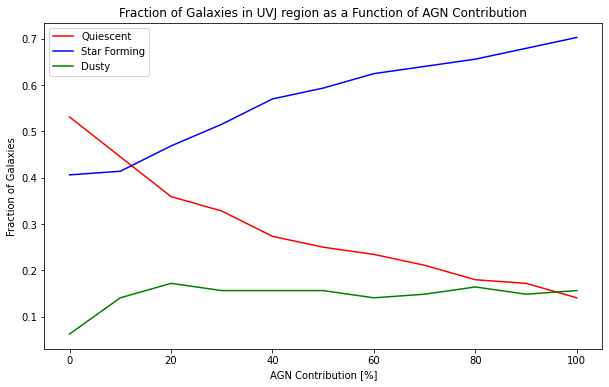

In [216]:
# Use seaborn to plot a line plot of the fraction of each of the galaxy types as a function of the AGN contribution


plt.figure(figsize=(10, 6))
sns.lineplot(x='Alpha', y='Quiescent', data=region_fractions, label='Quiescent', color='r')
sns.lineplot(x='Alpha', y='Star Forming', data=region_fractions, label='Star Forming', color='b')
sns.lineplot(x='Alpha', y='Dusty', data=region_fractions, label='Dusty', color='g')
plt.ylabel('Fraction of Galaxies')
plt.xlabel('AGN Contribution [%]')
plt.title('Fraction of Galaxies in UVJ region as a Function of AGN Contribution')
plt.legend()
plt.show()


0.0
10.0
20.0
30.000000000000004
40.0
50.0
60.00000000000001
70.0
80.0
90.0
100.0


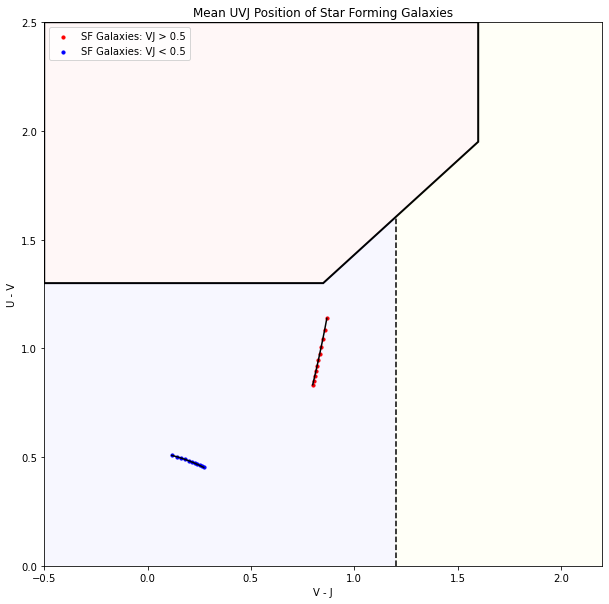

In [217]:
# In addition to this now that we know about the fractions, and all of this information we can create points to explore the change in the UVJ diagram

# For each region, lets see how the mean UVJ position looks like
sf_galaxies = df[df['GalaxyType_0'] == 1]

# First for the sf region - we only consider the inital position for this 
sf_galaxies_greater05 = sf_galaxies[sf_galaxies['VJ_0'] > 0.5]

# To double check the analysis, we also limit only the right side of the SFR (> 0.5)
sf_galaxies_smaller05 = sf_galaxies[sf_galaxies['VJ_0'] < 0.5] 






# Calculate the mean UVJ position for the star forming galaxies
# we want the mean UV, and VJ values for each of the alpha values
sf_uv_greater = []
sf_vj_greater = []

sf_uv_smaller = []
sf_vj_smaller = []
for i, alpha in enumerate(alpha_values):
    print(alpha)
    sf_uv_greater.append(sf_galaxies_greater05[f'UV_{int(alpha)}'].mean())
    sf_vj_greater.append(sf_galaxies_greater05[f'VJ_{int(alpha)}'].mean())
    sf_uv_smaller.append(sf_galaxies_smaller05[f'UV_{int(alpha)}'].mean())
    sf_vj_smaller.append(sf_galaxies_smaller05[f'VJ_{int(alpha)}'].mean())
    
# Now we can plot the mean UVJ position for the star forming galaxies
plt.figure(figsize=(10, 10))

# Plotting points with a specific size
plt.scatter(sf_vj_greater, sf_uv_greater, color='r', s=10, label='SF Galaxies: VJ > 0.5')  # Specify color as 'r' for red
plt.scatter(sf_vj_smaller, sf_uv_smaller, color='b', s=10, label='SF Galaxies: VJ < 0.5')  # Specify color as 'r' for red

# # Plotting a line connecting the points
plt.plot(sf_vj_greater, sf_uv_greater, 'k-')  # 'b-' specifies a blue solid line
plt.plot(sf_vj_smaller, sf_uv_smaller, 'k-')  # 'b-' specifies a blue solid line



# UVJ PLot Setup
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Mean UVJ Position of Star Forming Galaxies")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.legend()
plt.savefig('outputs/UVJPlots/SFG_UVJMeanMovement.png')
plt.show()

# # Plot the vector between the first and last point
# plt.figure(figsize=(10, 10))
# plt.plot(sf_vj_greater, sf_uv_greater, 'r.', label='VJ > 0.5')
# plt.plot(sf_vj_smaller, sf_uv_smaller, 'b.', label='VJ < 0.5')
# plt.plot([sf_vj_greater[0], sf_vj_greater[-1]], [sf_uv_greater[0], sf_uv_greater[-1]], 'k-', label='VJ > 0.5')
# plt.plot([sf_vj_smaller[0], sf_vj_smaller[-1]], [sf_uv_smaller[0], sf_uv_smaller[-1]], 'k-', label='VJ < 0.5')
# plt.ylabel('U - V')
# plt.xlabel('V - J')
# plt.title("Mean UVJ Position of Star Forming Galaxies")
# plt.xlim([-0.5, 2.2])
# plt.ylim([0, 2.5])
# plt.legend()
# plt.show()



In [218]:
# We can see from above the path of the points
# we would like to quantify this by getting a vector magnitude which represents the change in the UVJ diagram
# This magnitude will be the mean change in position of the UVJ diagram for the star forming galaxies at the two different areas
# of the UVJ diagram: Star Forming Region

# We will calculate the magnitude of the vector between the first and last point
# for the star forming galaxies

# The magnitude of the vector is given by: sqrt((x2 - x1)^2 + (y2 - y1)^2)
# where x1, y1 is the first point, and x2, y2 is the last point

# Calculate the magnitude of the vector for the star forming galaxies
# for the VJ > 0.5 and VJ < 0.5
magnitude_vector_greater = np.sqrt((sf_vj_greater[0] - sf_vj_greater[-1])**2 + (sf_uv_greater[0] - sf_uv_greater[-1])**2)
magnitude_vector_smaller = np.sqrt((sf_vj_smaller[0] - sf_vj_smaller[-1])**2 + (sf_uv_smaller[0] - sf_uv_smaller[-1])**2)

# First print the vector components, x and y components
print(f'Vector Components for Star Forming Galaxies (VJ > 0.5), x: {sf_vj_greater[0] - sf_vj_greater[-1]}, y: {sf_uv_greater[0] - sf_uv_greater[-1]}')
print(f'Vector Components for Star Forming Galaxies (VJ < 0.5), x: {sf_vj_smaller[0] - sf_vj_smaller[-1]}, y: {sf_uv_smaller[0] - sf_uv_smaller[-1]}')

# Now print the vector magnitude
print(f'Magnitude of Vector for Star Forming Galaxies with VJ > 0.5: {magnitude_vector_greater}')
print(f'Magnitude of Vector for Star Forming Galaxies with VJ < 0.5: {magnitude_vector_smaller}')



Vector Components for Star Forming Galaxies (VJ > 0.5), x: 0.06826431202731265, y: 0.30521954783471794
Vector Components for Star Forming Galaxies (VJ < 0.5), x: -0.1546019067038955, y: 0.05521812756662181
Magnitude of Vector for Star Forming Galaxies with VJ > 0.5: 0.3127602734955192
Magnitude of Vector for Star Forming Galaxies with VJ < 0.5: 0.16416696125726313


0.0
10.0
20.0
30.000000000000004
40.0
50.0
60.00000000000001
70.0
80.0
90.0
100.0


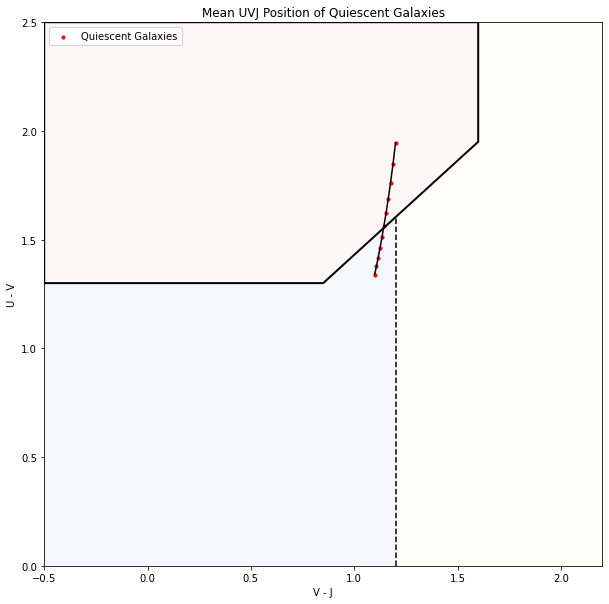

In [219]:


# We are doing this for the Quiescent Region 
quiescent_galaxies = df[df['GalaxyType_0'] == 0]

# We are not splitting up the quiescent galaxies, so we can just calculate the mean UVJ position for the quiescent galaxies
quiescent_uv = []
quiescent_vj = []


for i, alpha in enumerate(alpha_values):
    print(alpha)
    quiescent_uv.append(quiescent_galaxies[f'UV_{int(alpha)}'].mean())
    quiescent_vj.append(quiescent_galaxies[f'VJ_{int(alpha)}'].mean())
    
        
# Now we can plot the mean UVJ position for the star forming galaxies
plt.figure(figsize=(10, 10))

# Plotting points with a specific size
plt.scatter(quiescent_vj, quiescent_uv, color='r', s=10, label='Quiescent Galaxies')  # Specify color as 'r' for red

# # Plotting a line connecting the points
plt.plot(quiescent_vj, quiescent_uv, 'k-')  # 'b-' specifies a blue solid line

# UVJ PLot Setup
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Mean UVJ Position of Quiescent Galaxies")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.legend()
plt.savefig('outputs/UVJPlots/QuiescentUVJ_MeanMovement.png')
plt.show()

In [220]:
# We also calculate the magnitude of the vector for the quiescent galaxies, and components, as before

# Calculate the magnitude of the vector for the star forming galaxies

magnitude_vector_quiescent = np.sqrt((quiescent_vj[0] - quiescent_vj[-1])**2 + (quiescent_uv[0] - quiescent_uv[-1])**2)

# First print the vector components, x and y components
print(f'Vector Components for Quiescent Galaxies, x: {quiescent_vj[0] - quiescent_vj[-1]}, y: {quiescent_uv[0] - quiescent_uv[-1]}')

# Now print the vector magnitude
print(f'Magnitude of Vector for Quiescent Galaxies: {magnitude_vector_quiescent}')



Vector Components for Quiescent Galaxies, x: 0.10080553476747589, y: 0.6063996640998657
Magnitude of Vector for Quiescent Galaxies: 0.6147213258543962


0.0
10.0
20.0
30.000000000000004
40.0
50.0
60.00000000000001
70.0
80.0
90.0
100.0


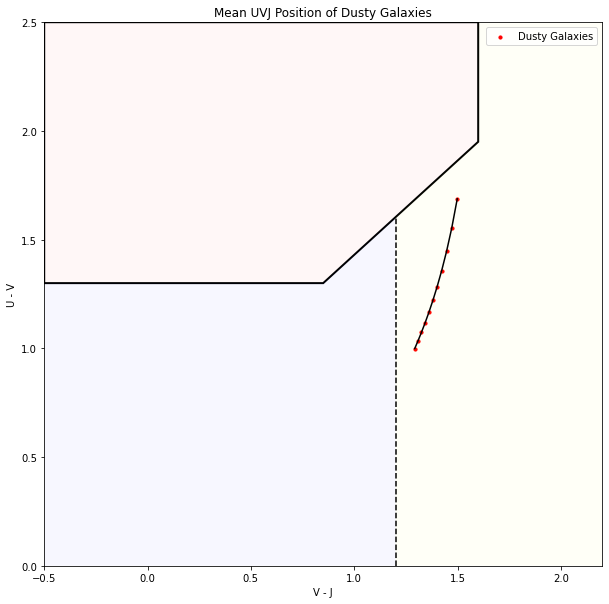

In [221]:
# Now that we have this sorted, we can do the last population of galaxies, the dusty galaxies
dusty_galaxies = df[df['GalaxyType_0'] == 2]

# We are not splitting up the dusty galaxies, so we can just calculate the mean UVJ position for the dusty galaxies
dusty_uv = []
dusty_vj = []



for i, alpha in enumerate(alpha_values):
    print(alpha)
    dusty_uv.append(dusty_galaxies[f'UV_{int(alpha)}'].mean())
    dusty_vj.append(dusty_galaxies[f'VJ_{int(alpha)}'].mean())
    
    
        
# Now we can plot the mean UVJ position for the star forming galaxies
plt.figure(figsize=(10, 10))

# Plotting points with a specific size
plt.scatter(dusty_vj, dusty_uv, color='r', s=10, label='Dusty Galaxies')  # Specify color as 'r' for red

# # Plotting a line connecting the points
plt.plot(dusty_vj, dusty_uv, 'k-')  # 'b-' specifies a blue solid line


# UVJ PLot Setup
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Mean UVJ Position of Dusty Galaxies")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])
#plt.colorbar().set_label('AGN Contribution')
    
# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

plt.legend()
plt.savefig('outputs/UVJPlots/DustyGalaxiesMeanMovement.png')
plt.show()





In [222]:
# Outputing the vector magnitude for the dusty galaxies

# Calculate the magnitude of the vector for the dusty

magnitude_vector_dusty = np.sqrt((dusty_vj[0] - dusty_vj[-1])**2 + (dusty_uv[0] - dusty_uv[-1])**2)

# First print the vector components, x and y components

print(f'Vector Components for Dusty Galaxies, x: {dusty_vj[0] - dusty_vj[-1]}, y: {dusty_uv[0] - dusty_uv[-1]}')

# Now print the vector magnitude

print(f'Magnitude of Vector for Dusty Galaxies: {magnitude_vector_dusty}')



Vector Components for Dusty Galaxies, x: 0.20583727178276368, y: 0.6885263482312767
Magnitude of Vector for Dusty Galaxies: 0.7186358707048157


In [226]:
# Now what we can do is to create a dataframe with the magnitude of the vector for each of the galaxy types
# and find the vector magnitude for each of the galaxy types as a function of the AGN contribution
# with the inital position being one point, and the new point being a function of the AGN contribution

# Create a dataframe
vector_magnitudes = pd.DataFrame(data=alpha_values, columns=['Alpha'])




In [229]:
# Notably we need to recalculate the vector magnitude for each galaxy type 
# as this increases with increasing alpha value

# We will calculate the magnitude of the vector for the star forming galaxies
# for the VJ > 0.5 and VJ < 0.5

# Create a list of vector magnitudes
vector_magnitudes_quiescent = []
vector_magnitudes_sf_greater = []
vector_magnitudes_sf_smaller = []
vector_magnitudes_dusty = []

# Define the mean inital position for each population of galaxies
quiescent_uv_0 = quiescent_galaxies[f'UV_0'].mean()
quiescent_vj_0 = quiescent_galaxies[f'VJ_0'].mean()

sf_uv_greater_0 = sf_galaxies_greater05[f'UV_0'].mean()
sf_vj_greater_0 = sf_galaxies_greater05[f'VJ_0'].mean()

sf_uv_smaller_0 = sf_galaxies_smaller05[f'UV_0'].mean()
sf_vj_smaller_0 = sf_galaxies_smaller05[f'VJ_0'].mean()

dusty_uv_0 = dusty_galaxies[f'UV_0'].mean()
dusty_vj_0 = dusty_galaxies[f'VJ_0'].mean()



for i, alpha in enumerate(alpha_values):
    # Calculate the magnitude of the vector for the quiescent galaxies
    quiescent_uv = quiescent_galaxies[f'UV_{int(alpha)}'].mean()
    quiescent_vj = quiescent_galaxies[f'VJ_{int(alpha)}'].mean()
    # We want the vector from the inital position to the position at a point alpha
    vector_magnitude_quiescent = np.sqrt((quiescent_vj_0 - quiescent_vj)**2 + (quiescent_uv_0 - quiescent_uv)**2)
    vector_magnitudes_quiescent.append(vector_magnitude_quiescent)
    
    # Calculate the magnitude of the vector for the star forming galaxies
    sf_uv_greater = sf_galaxies_greater05[f'UV_{int(alpha)}'].mean()
    sf_vj_greater = sf_galaxies_greater05[f'VJ_{int(alpha)}'].mean()
    vector_magnitude_sf_greater = np.sqrt((sf_vj_greater_0 - sf_vj_greater)**2 + (sf_uv_greater_0 - sf_uv_greater)**2)
    vector_magnitudes_sf_greater.append(vector_magnitude_sf_greater)
    
    sf_uv_smaller = sf_galaxies_smaller05[f'UV_{int(alpha)}'].mean()
    sf_vj_smaller = sf_galaxies_smaller05[f'VJ_{int(alpha)}'].mean()
    vector_magnitude_sf_smaller = np.sqrt((sf_vj_smaller_0 - sf_vj_smaller)**2 + (sf_uv_smaller_0 - sf_uv_smaller)**2)
    vector_magnitudes_sf_smaller.append(vector_magnitude_sf_smaller)
    
    # Calculate the magnitude of the vector for the dusty galaxies
    dusty_uv = dusty_galaxies[f'UV_{int(alpha)}'].mean()
    dusty_vj = dusty_galaxies[f'VJ_{int(alpha)}'].mean()
    vector_magnitude_dusty = np.sqrt((dusty_vj_0 - dusty_vj)**2 + (dusty_uv_0 - dusty_uv)**2)
    vector_magnitudes_dusty.append(vector_magnitude_dusty)
    
# Add the vector magnitudes for each of the galaxy types
vector_magnitudes['Quiescent'] = vector_magnitudes_quiescent
vector_magnitudes['Star Forming (VJ >0.5)'] = vector_magnitudes_sf_greater
vector_magnitudes['Star Forming (VJ <0.5)'] = vector_magnitudes_sf_smaller
vector_magnitudes['Dusty'] = vector_magnitudes_dusty

    

In [232]:
vector_magnitudes


,Alpha,Quiescent,Star Forming (VJ >0.5),Star Forming (VJ <0.5),Dusty
0,0.0,0.000000,0.000000,0.000000,0.000000
1,10.0,0.100288,0.053567,0.026047,0.137492
2,20.0,0.186021,0.096860,0.048387,0.247190
3,30.0,0.260914,0.134219,0.068025,0.337960
4,40.0,0.327321,0.167330,0.085585,0.414995
5,50.0,0.386867,0.197124,0.101484,0.481609
6,60.0,0.440738,0.224211,0.116019,0.540057
7,70.0,0.489829,0.249023,0.129406,0.591938
8,80.0,0.534838,0.271889,0.141811,0.638432
9,90.0,0.576318,0.293066,0.153363,0.680434


In [ ]:

# Save this 
vector_magnitudes.to_csv('outputs/UVJPlots/VectorMagnitudeDifferences.csv', index=False)